In [29]:
using Random, LinearAlgebra, Statistics, StatsBase, StatsPlots

In [2]:
function between(A, l, h)
    C = []
    for a in A
       if (a <= h) && (a>= l)
            append!(C, a)
        end
    end
        return C
end

function suma_menor(A, l)
    cont = 0
    for a in A
        if a < l
            cont+=1
        end
    end
    return cont
end

function suma_mayor(A, h)
    cont = 0
    for a in A
        if a > h
            cont+=1
        end
    end
    return cont
end

suma_mayor (generic function with 1 method)

In [38]:
function random_median(S)
    L = size(S)[1]
    szR = convert(UInt32, ceil(L ^ (3/4)))
    R = sample(S,
                szR,
                replace=false)
    sort!(R)
    di = convert(UInt32, ceil(szR/2 - sqrt(L)) + 1)
    ui = convert(UInt32, floor(szR/2 + sqrt(L)))
    d = R[di]
    u = R[ui]
    ld = suma_menor(S, d)
    lu = suma_mayor(S, u)
    C = between(S, d, u)
    
    if ~ ((ld > L/2) ||  (lu > L/2))
        if size(C)[1] <= 4 * L ^ (3/4)
            sort!(C)
            return C[convert(UInt32, floor(L/2) - ld)]
        end
    end
end

random_median (generic function with 1 method)

In [43]:
N = 10
L = [10, 100, 1000, 10000, 100000]

R = Array{Float64}(undef, size(L)[1], N)

i = 1

t = time_ns()

for l in L
    for n in 1:N
        S = sample(1:l*10, l, replace=false)
        t = time_ns()
        random_median(S)
        R[i, n] = (time_ns() - t) * 1.0e-9
    end
    i += 1
end

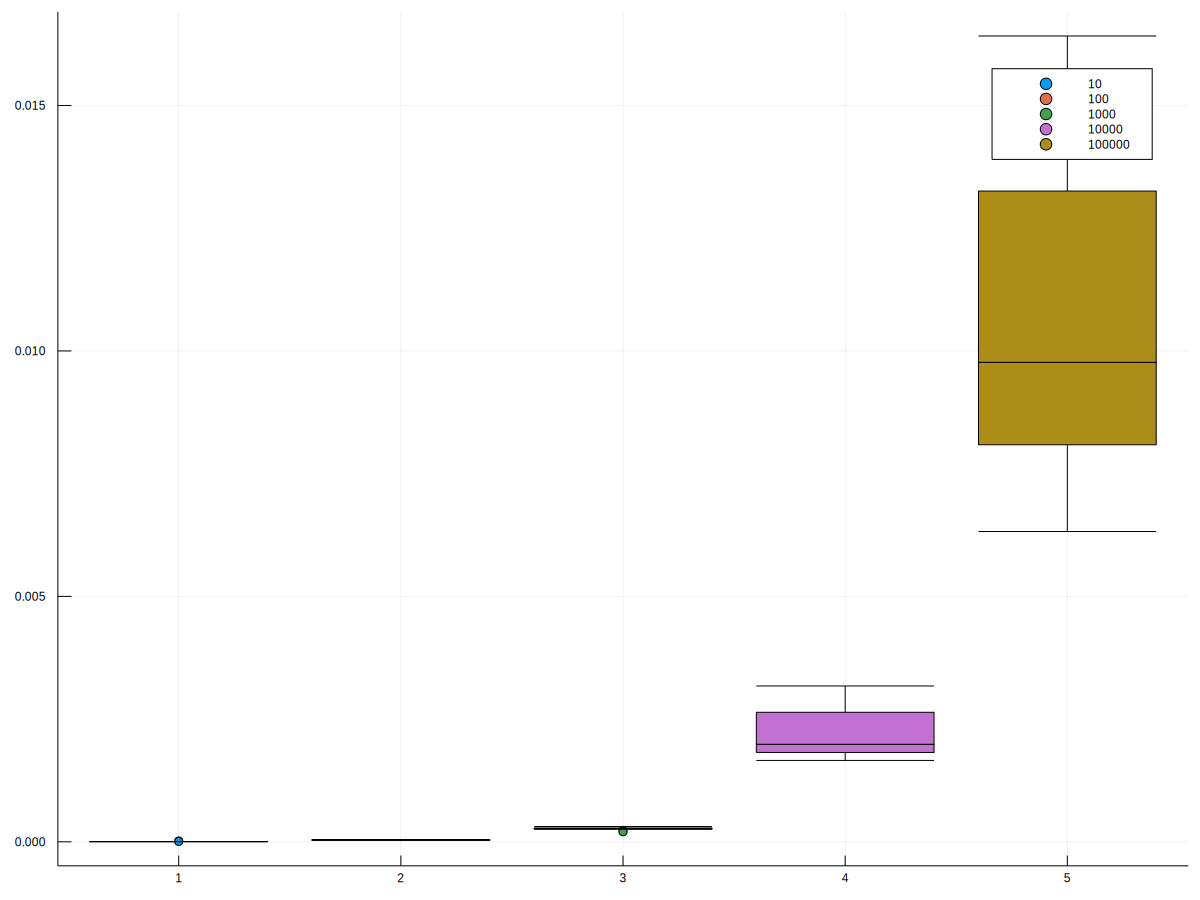

In [44]:
boxplot(permutedims(R),
        labels=permutedims([string(l) for l in L]),
        size=(1200, 900))

In [22]:
a = random_median(S)

352

In [23]:
a

352